# **1.Business  Understanding**




•  Objectifs du projet : Prédire les ventes de chaque produit en magasin afin d'aider Big Mart à optimiser les inventaires, les stocks et les stratégies de tarification.

•  Contexte métier : Comprendre les dynamiques de vente des produits en fonction de leurs caractéristiques (par ex. : type de produit, taille de l’emballage) et des caractéristiques des magasins (par ex. : taille du magasin, emplacement).

•  Problème de data mining : Développer un modèle de régression pour prédire le montant des ventes de chaque article.


# **2.Data Understanding**

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# Data Collection and Processing

In [ ]:
# loading the data from csv file to Pandas DataFrame
big_mart_data = pd.read_csv('/content/Train.csv')
# first 5 rows of the dataframe
big_mart_data.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# number of data points & number of features
print('shape =',big_mart_data.shape)
#dislay all the information about the dataset
big_mart_data.info()

shape = (8523, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**The dataset includes:**

8523 samples

10 variables:

*   Item_Identifier: Unique identifier for each product.
*   Item_Weight: Weight of the product.

*   Item_Fat_Content: Fat content category of the item (e.g., low fat, regular).

*   Item_Visibility: Visibility percentage of the product in the store.
*   Item_Type: Category or type of the product


*   Item_MRP: Maximum Retail Price of the product.

*  Outlet_Identifier: Unique identifier for each store.
*  Outlet_Size: Store size.

*   Outlet_Location_Type: Location type of the store .

*   Item_Outlet_Sales: Sales revenue of the product in a specific store.




**the dataset includes 7 Categorical Features**:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type


# **3.Data Preparation**

# 3.1 Data Imputation

The columns Item_Weight and Outlet_Size contain missing values.

For Item_Weight:we will replace missing weights with the mean weight of similar items based on Item_Type.

For Outlet_Size:we will fill missing values with the most common Outlet_Size for each Outlet_Type

In [ ]:
# Create a pivot table to calculate the mean Item_Weight for each Item_Type
mean_of_Item_Weight = big_mart_data.pivot_table(values='Item_Weight', columns='Item_Type', aggfunc='mean')
# Identify the rows where Item_Weight is missing
miss_values = big_mart_data['Item_Weight'].isnull()
# Fill missing Item_Weight values by applying the mean weight for each corresponding Item_Type
big_mart_data.loc[miss_values, 'Item_Weight'] = big_mart_data.loc[miss_values, 'Item_Type'].apply(lambda x: mean_of_Item_Weight[x])




In [ ]:
# Create a pivot table to find the most common (mode) Outlet_Size for each Outlet_Type
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
# Identify the rows where Outlet_Size is missing
miss_values = big_mart_data['Outlet_Size'].isnull()
# Fill missing Outlet_Size values by applying the mode of Outlet_Size for the corresponding Outlet_Type
big_mart_data.loc[miss_values, 'Outlet_Size'] = big_mart_data.loc[miss_values, 'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])


In [ ]:
# checking for missing values
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


# 3.2 Data Pre-Processing

In [ ]:
# Display unique values for each specified column in the dataset
# This helps to understand the distinct categories or values in each feature.



# Unique values in 'Item_Fat_Content'
print("\nUnique values in Item_Fat_Content:")
print(big_mart_data['Item_Fat_Content'].unique())

# Unique values in 'Item_Type'
print("\nUnique values in Item_Type:")
print(big_mart_data['Item_Type'].unique())



# Unique values in 'Outlet_Size'
print("\nUnique values in Outlet_Size:")
print(big_mart_data['Outlet_Size'].unique())

# Unique values in 'Outlet_Location_Type'
print("\nUnique values in Outlet_Location_Type:")
print(big_mart_data['Outlet_Location_Type'].unique())

# Unique values in 'Outlet_Type'
print("\nUnique values in Outlet_Type:")
print(big_mart_data['Outlet_Type'].unique())




Unique values in Item_Fat_Content:
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']

Unique values in Item_Type:
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']

Unique values in Outlet_Size:
['Medium' 'Small' 'High']

Unique values in Outlet_Location_Type:
['Tier 1' 'Tier 3' 'Tier 2']

Unique values in Outlet_Type:
['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [ ]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

#` 3.3 Data Analysis`

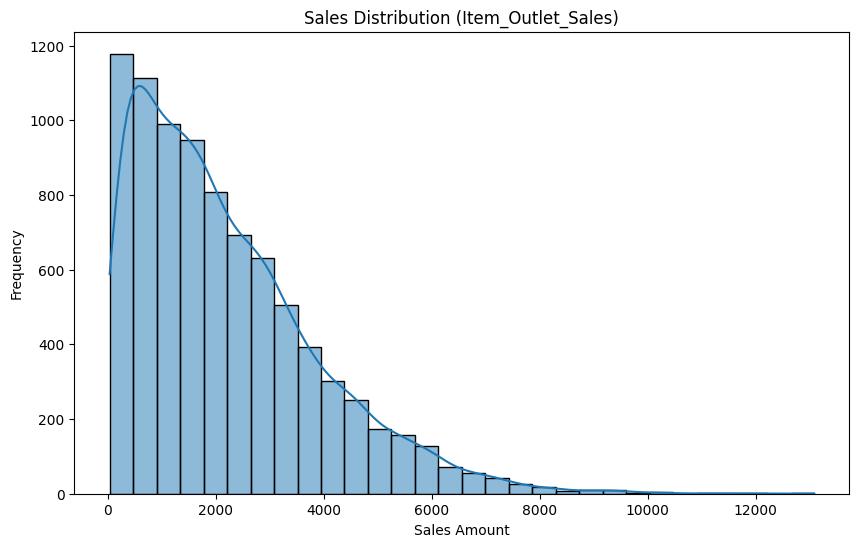

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sales Distribution
plt.figure(figsize=(10, 6))
sns.histplot(big_mart_data['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Sales Distribution (Item_Outlet_Sales)')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()


**Skewness**: The distribution is positively skewed, meaning there are more products with lower sales and fewer products with very high sales. This is a common pattern in sales data, where a small number of "bestsellers" account for a disproportionate amount of total sales.

**Peak**: The peak of the distribution is around 1-1000 units, suggesting that a significant portion of products fall within this sales range.

**Range**: The sales amounts span from almost 0 to over 12000 units, indicating a wide variation in product performance.

## Categorical Features

<ipython-input-10-52ff047465bd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=big_mart_data,palette='Set1')


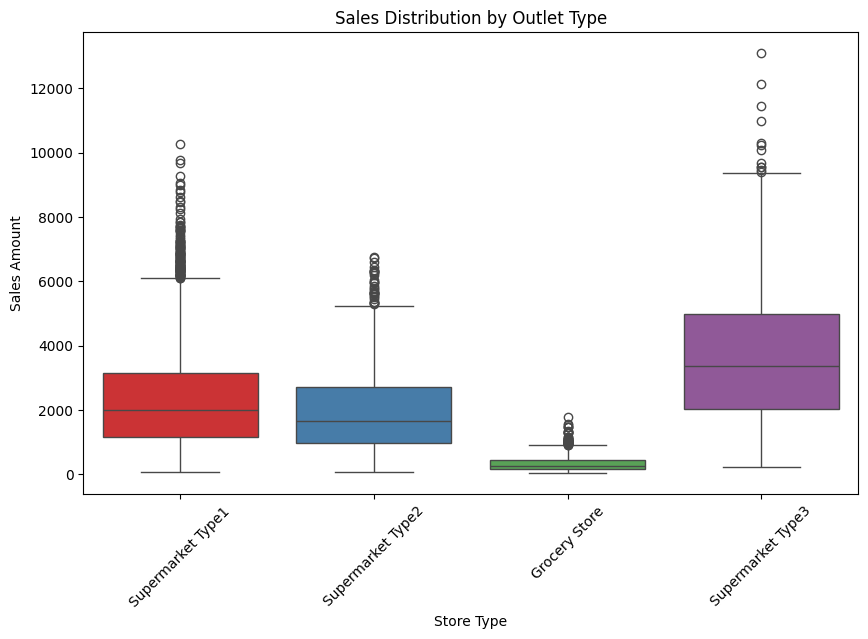

In [ ]:
# Visualize the sales distribution by Outlet_Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=big_mart_data,palette='Set1')
plt.title("Sales Distribution by Outlet Type")
plt.xlabel('Store Type')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()


**Median Sales:** Supermarket Type 3 has the highest median sales, indicating stronger performance compared to other types.

**Sales Variability:** Type 3 also shows significant variability in sales, while Grocery Stores exhibit a more consistent and concentrated sales distribution.

**Outliers:**The presence of outliers in Supermarkets Type 1 and Type 3 suggests some stores experience exceptionally high sales, warranting further investigation into specific factors driving these results.

**Comparative Insights:** Overall, supermarkets outperform Grocery Stores in sales, likely due to differences in size, target demographics, and product offerings.

<ipython-input-11-1a7ea6063421>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=big_mart_data, x='Outlet_Size', y='Item_Outlet_Sales', palette='Set1')


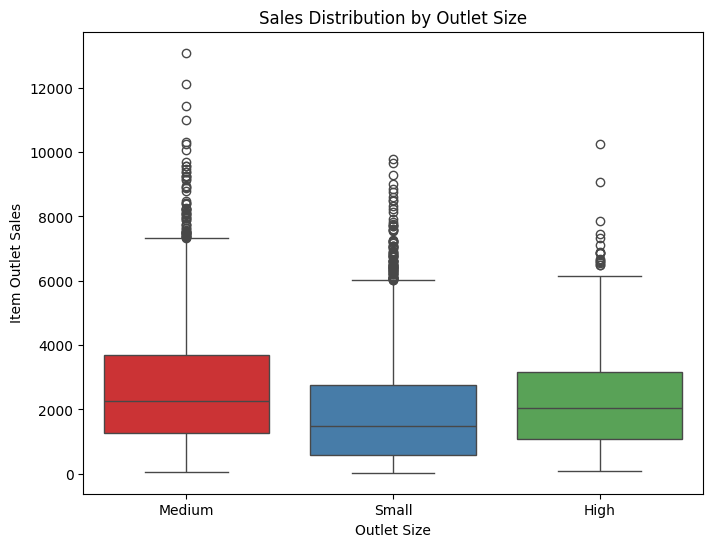

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=big_mart_data, x='Outlet_Size', y='Item_Outlet_Sales', palette='Set1')
plt.title('Sales Distribution by Outlet Size')
plt.xlabel('Outlet Size')
plt.ylabel('Item Outlet Sales')
plt.show()

**Median Sales:** Medium Size has the highest median sales, though only slightly higher than small sizes and high size.

**Sales Variability:** All three outlet sizes display significant sales variability.

**Outliers:** Medium Size shows a notable presence of outliers, indicating some stores outperform others.

**Comparative Insights:** Overall, the three sizes perform comparably, with slight differences in median and variability.

<ipython-input-12-044b3553f57e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=big_mart_data, x='Outlet_Location_Type', y='Item_Outlet_Sales', palette='Set1')


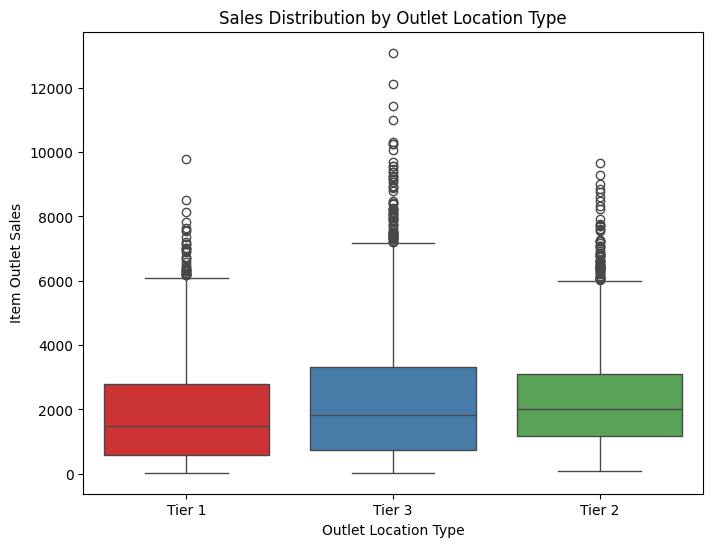

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=big_mart_data, x='Outlet_Location_Type', y='Item_Outlet_Sales', palette='Set1')
plt.title('Sales Distribution by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.show()

**Median Sales:** The median sales are similar across all outlet types (around 2000).

**Outliers:**Tiers 1, 2, and 3 each have high sales outliers, with Tier 3 reaching up to 12,000.

**Conclusion**: Outlet type does not significantly impact median sales, but certain stores in each tier have exceptionally high sales.

<ipython-input-13-fcac9c84f6ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=big_mart_data, x='Item_Type', y='Item_Outlet_Sales', palette='Set2')


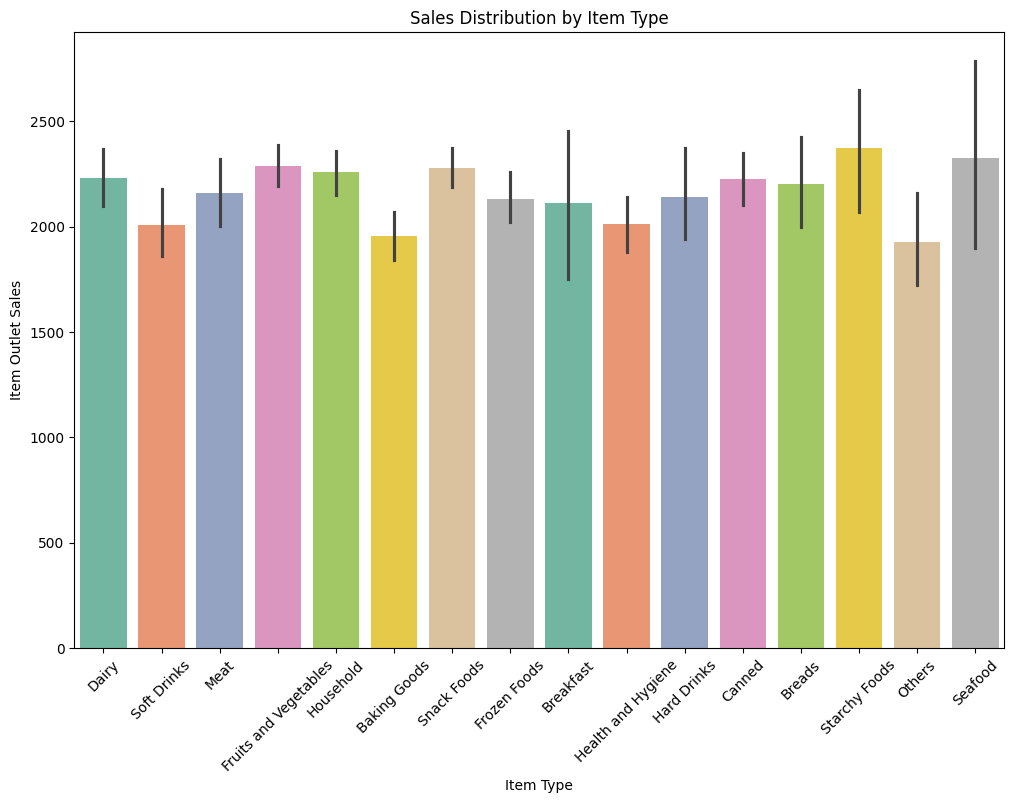

In [ ]:
plt.figure(figsize=(12, 8))  # Adjusted figure size for better readability
sns.barplot(data=big_mart_data, x='Item_Type', y='Item_Outlet_Sales', palette='Set2')
plt.title('Sales Distribution by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

**Consistency in Average Sales:** Most product types have similar average sales, ranging between 1800 and 2500 units. This shows a steady overall demand across different product categories.

**Sales Variability:** The error bars (black lines) above each bar represent
the variability of sales around the average.




*   High Variability Products (like Seafood): These categories have significantly fluctuating sales, suggesting that some products in this category are very popular, while others are much less so.
*   Low Variability Products (like Household and Fruits and Vegetables): These categories have more stable sales, indicating a predictable and consistent demand.





<ipython-input-14-8d2611121c86>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=big_mart_data, x='Item_Fat_Content', y='Item_Outlet_Sales', palette='Set2')


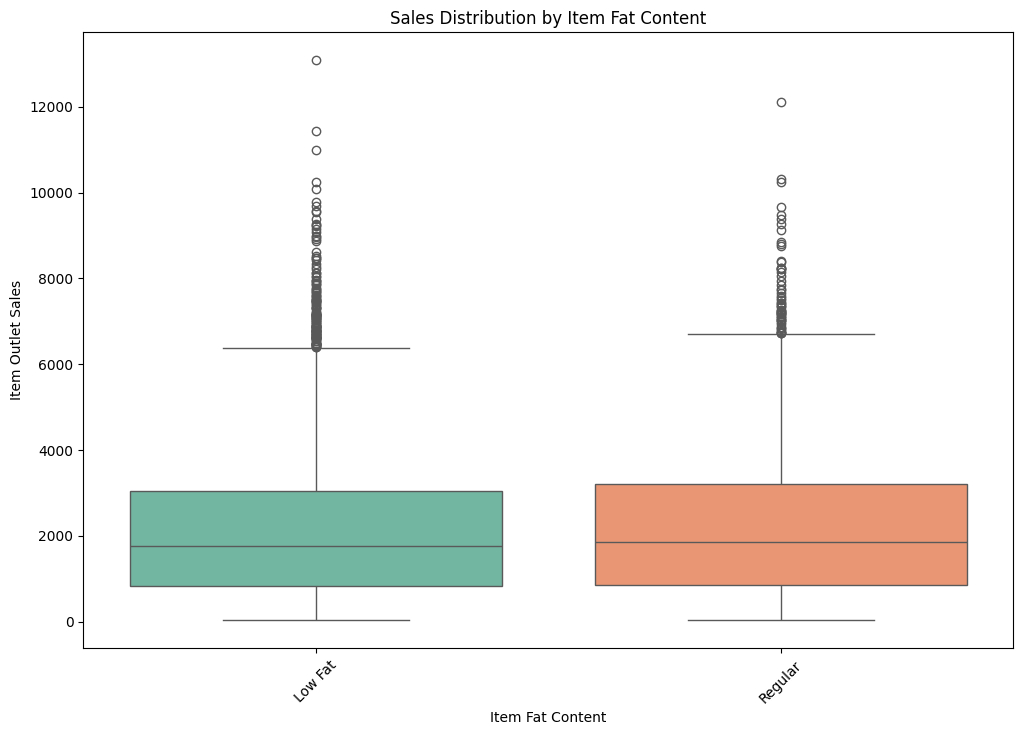

In [ ]:
plt.figure(figsize=(12, 8))  # Adjusted figure size for better readability
sns.boxplot(data=big_mart_data, x='Item_Fat_Content', y='Item_Outlet_Sales', palette='Set2')
plt.title('Sales Distribution by Item Fat Content')
plt.xlabel('Item Fat Content')
plt.ylabel('Item Outlet Sales')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()


The box plot shows that Item Outlet Sales are similar for "Low Fat" and "Regular" items, with comparable median values and interquartile ranges.

Both categories have a significant number of high-value outliers, which indicate some items have exceptionally high sales.

## Numerical Features

In [ ]:
sns.set()

<ipython-input-16-21151ade0b57>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Weight'])


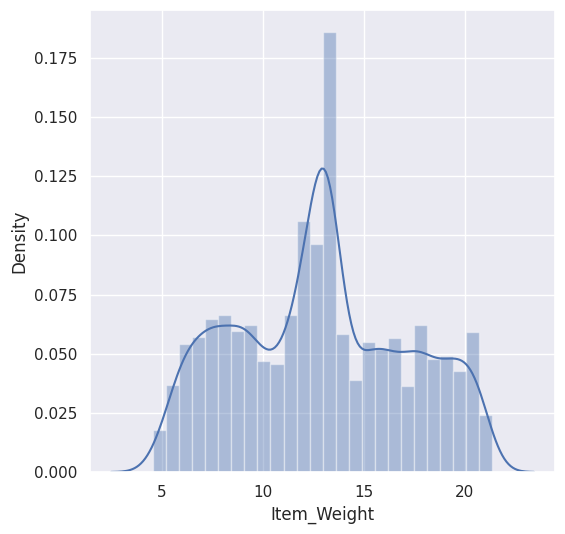

In [ ]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

The distribution is roughly symmetric, with a main peak around 15 units, suggesting this is the typical weight.

There are a few low-density areas at both ends, showing that very low and very high weights are less common (potential outliers).

**Conclusion:** This plot suggests that most items in the dataset have similar weights around 15 units, with some variation and a few uncommon extreme values.

<ipython-input-17-386044597ca3>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_Visibility'])


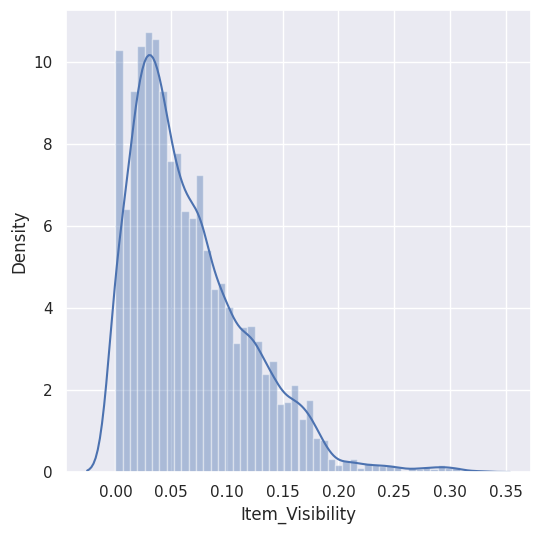

In [ ]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

The distribution is highly skewed to the right, with a majority of items having very low visibility (close to 0).

The curve tails off after 0.1, suggesting that high visibility is rare in this dataset.

**Conclusion**: Most items have low visibility, potentially indicating that these products are not prominently displayed or that high visibility is uncommon in this dataset.

<ipython-input-18-0b69bf4930c1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Item_MRP'])


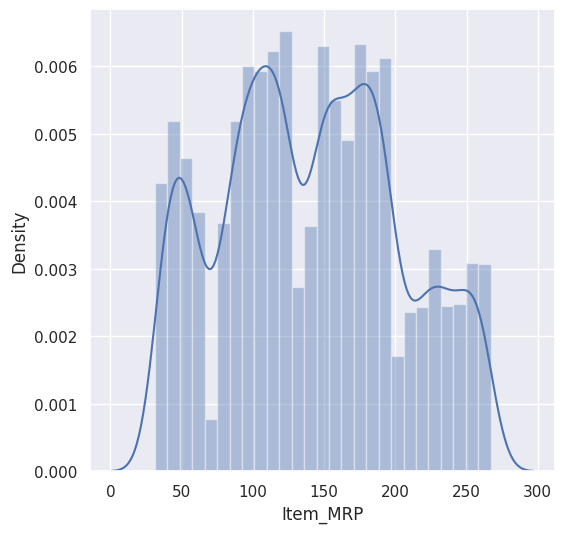

In [ ]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()


**Multimodal Distribution:** The plot reveals multiple peaks, suggesting that "Item_MRP" may not be normally distributed. This kind of distribution could indicate different pricing tiers or categories in the items.

**Range of Values:** The values for "Item_MRP" range from close to 0 up to about 300. This could imply a wide variance in the prices of items within the dataset.

**Possible Implications: **This distribution might suggest different price segments or item categories, as there are several clear peaks rather than a single peak.





# 3.4 Data Encoding

The goal of this step is to encode data from categorical to numerical data. We will use
LabelEncoder to encode categorical variables with value between 0 and n_categories-1

In [ ]:
encoder = LabelEncoder()

In [ ]:
big_mart_data['Item_Identifier'] = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type'] = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier'] = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type'] = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type'] = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [ ]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting features and Target

In [ ]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

# 3.5 Data Scaling

# 3.6 Data Partitioning

In [ ]:
#X_train: matrix of features for training (80%)
#X_test: matrix of features for testing (20%)
#y_train: the corresponding labels of X_train
#y_test: the corresponding labels of X_test
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


# **4.Machine Learning**


In [ ]:
# Importing necessary packages
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initializing regression models
linear_reg = LinearRegression()
random_forest = RandomForestRegressor(n_estimators=500, random_state=42)
xgb_reg = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    min_child_weight=1,
    gamma=0,
    subsample=1,
    colsample_bytree=1,
    reg_alpha=0,
    reg_lambda=1,
    random_state=42
)

svr = SVR(kernel='rbf')  # Support Vector Regressor with RBF kernel
decision_tree = DecisionTreeRegressor(random_state=42)
knn = KNeighborsRegressor(n_neighbors=5)

# Using VotingRegressor instead of VotingClassifier
voting_reg = VotingRegressor(estimators=[('rf', random_forest), ('xgb', xgb_reg)])

# Training each model
linear_reg.fit(X_train, Y_train)
random_forest.fit(X_train, Y_train)
xgb_reg.fit(X_train, Y_train)
svr.fit(X_train, Y_train)
decision_tree.fit(X_train, Y_train)
knn.fit(X_train, Y_train)
voting_reg.fit(X_train, Y_train)

# Making predictions on the test set
y_pred_linear_reg = linear_reg.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)
y_pred_xgb = xgb_reg.predict(X_test)
y_pred_svr = svr.predict(X_test)
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_voting = voting_reg.predict(X_test)




# **5.Performance Evaluation**

In [ ]:
for model in (linear_reg,random_forest,xgb_reg, svr,decision_tree,knn,voting_reg):
    model.fit(X_train, Y_train)
    print(model.__class__.__name__, model.score(X_test, Y_test))

LinearRegression 0.4891325340712698
RandomForestRegressor 0.5558421689597988
XGBRegressor 0.5554114288999343
SVR -0.06161882665498486
DecisionTreeRegressor 0.1659124232428726
KNeighborsRegressor 0.19623334600209685
VotingRegressor 0.5623930280539117


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Printing evaluation metrics for each model
print("************ Linear Regression Performance ***************")
print("MSE:", mean_squared_error(Y_test, y_pred_linear_reg))
print("MAE:", mean_absolute_error(Y_test, y_pred_linear_reg))
print("MAPE:", mean_absolute_percentage_error(Y_test, y_pred_linear_reg))

print("************ Random Forest Performance ***************")
print("MSE:", mean_squared_error(Y_test, y_pred_random_forest))
print("MAE:", mean_absolute_error(Y_test, y_pred_random_forest))
print("MAPE:", mean_absolute_percentage_error(Y_test, y_pred_random_forest))

print("************ XGBoost Performance ***************")
print("MSE:", mean_squared_error(Y_test, y_pred_xgb))
print("MAE:", mean_absolute_error(Y_test, y_pred_xgb))
print("MAPE:", mean_absolute_percentage_error(Y_test, y_pred_xgb))

print("************ SVR Performance ***************")
print("MSE:", mean_squared_error(Y_test, y_pred_svr))
print("MAE:", mean_absolute_error(Y_test, y_pred_svr))
print("MAPE:", mean_absolute_percentage_error(Y_test, y_pred_svr))

print("************ Decision Tree Performance ***************")
print("MSE:", mean_squared_error(Y_test, y_pred_decision_tree))
print("MAE:", mean_absolute_error(Y_test, y_pred_decision_tree))
print("MAPE:", mean_absolute_percentage_error(Y_test, y_pred_decision_tree))

print("************ KNN Performance ***************")
print("MSE:", mean_squared_error(Y_test, y_pred_knn))
print("MAE:", mean_absolute_error(Y_test, y_pred_knn))
print("MAPE:", mean_absolute_percentage_error(Y_test, y_pred_knn))

print("************ Voting Regressor Performance ***************")
print("MSE:", mean_squared_error(Y_test, y_pred_voting))
print("MAE:", mean_absolute_error(Y_test, y_pred_voting))
print("MAPE:", mean_absolute_percentage_error(Y_test, y_pred_voting))


************ Linear Regression Performance ***************
MSE: 1577086.034467917
MAE: 944.8836499018653
MAPE: 0.9516149708325231
************ Random Forest Performance ***************
MSE: 1371148.4076591863
MAE: 820.5084697820528
MAPE: 0.5542198939119639
************ XGBoost Performance ***************
MSE: 1372478.1344047778
MAE: 812.4957531173304
MAPE: 0.5510517909080255
************ SVR Performance ***************
MSE: 3277296.6319201184
MAE: 1339.5041469228006
MAPE: 1.6985302295535076
************ Decision Tree Performance ***************
MSE: 2574890.6645199526
MAE: 1127.6234814076247
MAPE: 0.7214711730874496
************ KNN Performance ***************
MSE: 2481287.7106719892
MAE: 1148.2935840938417
MAPE: 1.4422071972436217
************ Voting Regressor Performance ***************
MSE: 1350925.4162179308
MAE: 810.5877550844704
MAPE: 0.5474414087847392


In [ ]:
big_mart_data.to_excel("fichier_nettoye.xlsx", index=False)

The Voting Regressor (combining Random Forest and XGBoost) is the best model based on this evaluation, as it produces the lowest error rates across all metrics. Random Forest and XGBoost also individually perform well and could be used if a simpler model is preferred.